## K-Means Algorithm
Input Data : X = {x1,...,xN}

Goal : Partition the data among some K number of clusters. Let us assume K is known to us.

Let µk denote the center of Kth Cluster (uk will be vector)

So we need to ﬁnd an assignment of data points to clusters, as well as a set of cluster centers{µk}, such that the sum of 
the squares of the distances of each data point to its closest cluster center µk, is a minimum.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
make_blobs?

In [5]:
x,y=make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

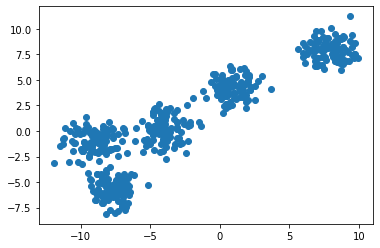

In [7]:
plt.figure(0)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [76]:
k=5
colors=['green','red','blue','yellow','orange']

clusters={}
for kx in range(k):
    #randomise random center for each cluster
    center = 10*(2*np.random.random((x.shape[1],))-1)
    points = []
    
    cluster = {
        'center':center,
        'points':points,
        'color': colors[kx]
        }
    
    clusters[kx] = cluster

In [71]:
# (2*np.random.random((x.shape[1],))-1)

In [77]:
clusters

{0: {'center': array([ 8.07230305, -8.68069484]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-6.83921584,  6.84754244]),
  'points': [],
  'color': 'red'},
 2: {'center': array([ 2.35361798, -2.53249854]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-8.87822704,  6.7793523 ]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-1.05580075, -3.62518828]),
  'points': [],
  'color': 'orange'}}

In [ ]:
def distance(v1,v2):
    returndef distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2)) np.sqrt(np.sum((v1-v2)**2))

In [78]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [94]:
# Assign every data point to one of the clusters
def assignPointToClusters(clusters): #E-Step
    for ix in range(x.shape[0]):
        dist = []
        curr_x = x[ix]

        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)

        
def updateClusters(clusters): # M-Step -> We update every cluster center according to the mean of the points in it
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] #Clear the list
        
def plotClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        #Plot the points
        #if any of the cluster is vry far away then no point will assign to it thats y try except block is used
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['color'])
        except:
            pass
        #Plot the cluster center
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")

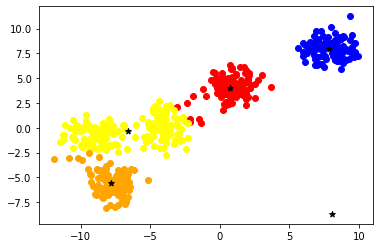

In [116]:
assignPointToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

1.K-Means is quite sensitive to initalization, if the init is not good, our algorithm is not able to make desired number of clusters.

2.To overcome this problem, we use technique called K-Means++ 
(described in paper Robust Seed Selection for K-Means type of Algorithms) 
which chooses initial centers so that they are statiscallly close to final ones.

3.The method is default choice for sklearn, so we will use it directly without going into much maths!

## Using Sci-kit Learn

In [117]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [118]:
X,y  = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

In [120]:
from sklearn.cluster import KMeans

In [125]:
kmeans  = KMeans(n_clusters=5,init='k-means++')

In [126]:
kmeans.fit(X,y)

KMeans(n_clusters=5)

In [127]:
centers = kmeans.cluster_centers_

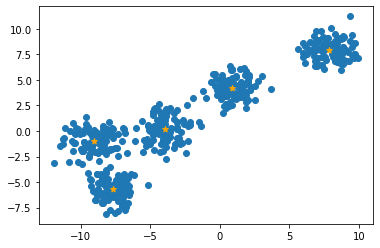

In [128]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1],marker='*',color='orange')
plt.show()

In [129]:
#it assign randomly each cluster as id
pred = kmeans.labels_

In [130]:
pred

array([4, 2, 3, 4, 4, 3, 0, 4, 2, 4, 2, 3, 2, 4, 3, 4, 2, 4, 4, 2, 1, 1,
       4, 3, 4, 1, 0, 0, 3, 0, 4, 0, 1, 1, 4, 1, 2, 2, 4, 1, 1, 1, 0, 0,
       3, 2, 2, 0, 0, 0, 2, 4, 0, 4, 4, 1, 4, 4, 2, 3, 2, 3, 3, 4, 0, 2,
       3, 3, 1, 3, 1, 4, 1, 4, 1, 3, 4, 0, 1, 1, 3, 1, 3, 0, 2, 0, 3, 2,
       0, 3, 0, 1, 4, 1, 1, 2, 4, 3, 3, 1, 2, 1, 3, 3, 2, 2, 2, 3, 3, 4,
       2, 0, 4, 2, 3, 1, 2, 0, 1, 3, 2, 3, 0, 4, 1, 0, 0, 0, 4, 4, 3, 3,
       4, 2, 2, 0, 3, 0, 3, 4, 4, 1, 3, 2, 0, 4, 2, 2, 4, 3, 4, 4, 3, 3,
       2, 1, 1, 0, 3, 4, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 4, 1, 2, 1, 0,
       4, 3, 2, 0, 2, 4, 2, 1, 0, 0, 1, 4, 3, 2, 1, 3, 0, 4, 0, 1, 3, 0,
       4, 4, 4, 1, 1, 2, 4, 0, 0, 4, 2, 4, 4, 4, 1, 2, 3, 2, 4, 4, 2, 0,
       3, 0, 0, 1, 4, 3, 4, 3, 0, 1, 3, 3, 4, 1, 4, 1, 3, 2, 3, 1, 1, 2,
       4, 4, 3, 3, 1, 2, 1, 4, 0, 2, 0, 4, 0, 0, 0, 0, 2, 1, 2, 4, 1, 2,
       0, 3, 2, 2, 2, 0, 4, 4, 3, 1, 1, 2, 3, 3, 4, 3, 0, 3, 2, 2, 0, 0,
       1, 0, 0, 2, 1, 4, 3, 1, 3, 0, 3, 3, 2, 4, 1,

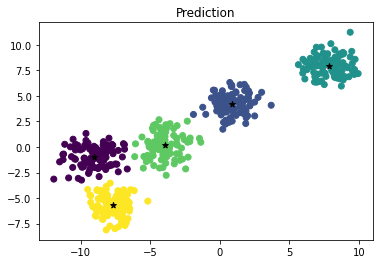

In [131]:
plt.scatter(X[:,0],X[:,1],c=pred)
plt.scatter(centers[:,0],centers[:,1],marker='*',color='black')
plt.title("Prediction")
plt.show()

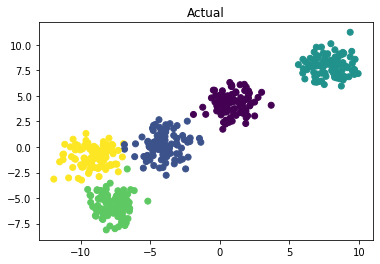

In [132]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.title("Actual")
plt.show()